In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#import random 
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('seaborn-data/titanic.csv')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Missing Data Visualization

In [6]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Here,i am checking number of null value in each attribute of the data set, age attribute have 177 null value, embarked have 2,deck have 688 and embark_town have 2.

In [7]:
data['age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

cheking on age attribute null, here true shows null and false shows notnull()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


looking for basic information about the data set, from here also we can make out number of missing value in each attributes and data types

In [11]:
data['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

Here in attribute class, we can count unique instances and group each unique instances by counting them.

<AxesSubplot:>

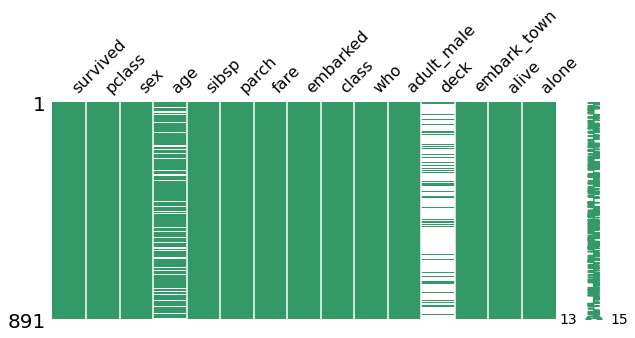

In [14]:
msno.matrix(data,figsize=(10,4),fontsize=16,color=(0.2,0.6,0.4))

This is matrix graph to visualize missing data, colum having maximum white strikes means in that column there is miximum missing value, from the graph above we can conclude that attribute deck has maximum missing value in this data set.

<AxesSubplot:>

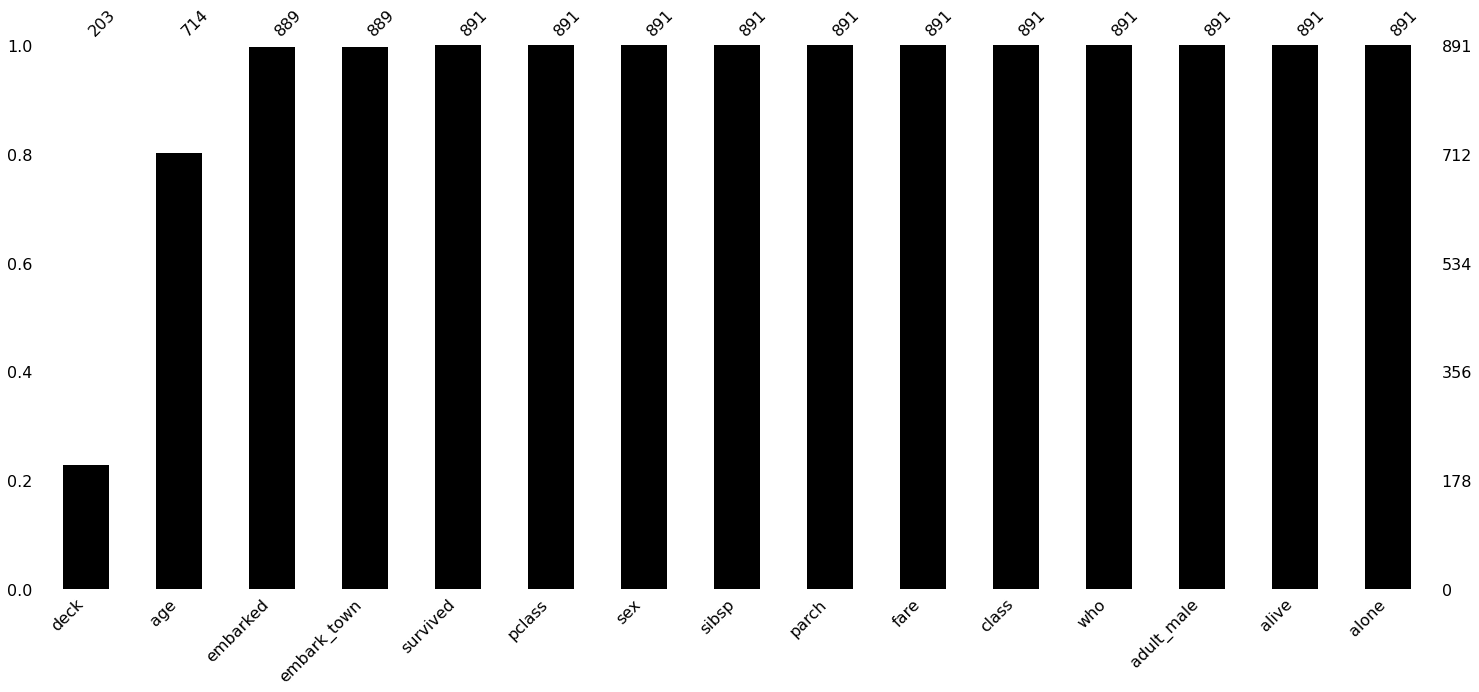

In [15]:
msno.bar(data,color='black',sort="ascending")

Above graph shows another way to visualize missing data using bar graph, graph shows missing data in ascending order out of total 891 instances, shortest graph shows maximum missing data, which means deck has maximum missing data followed by age, then embarked and embark_town.

<AxesSubplot:>

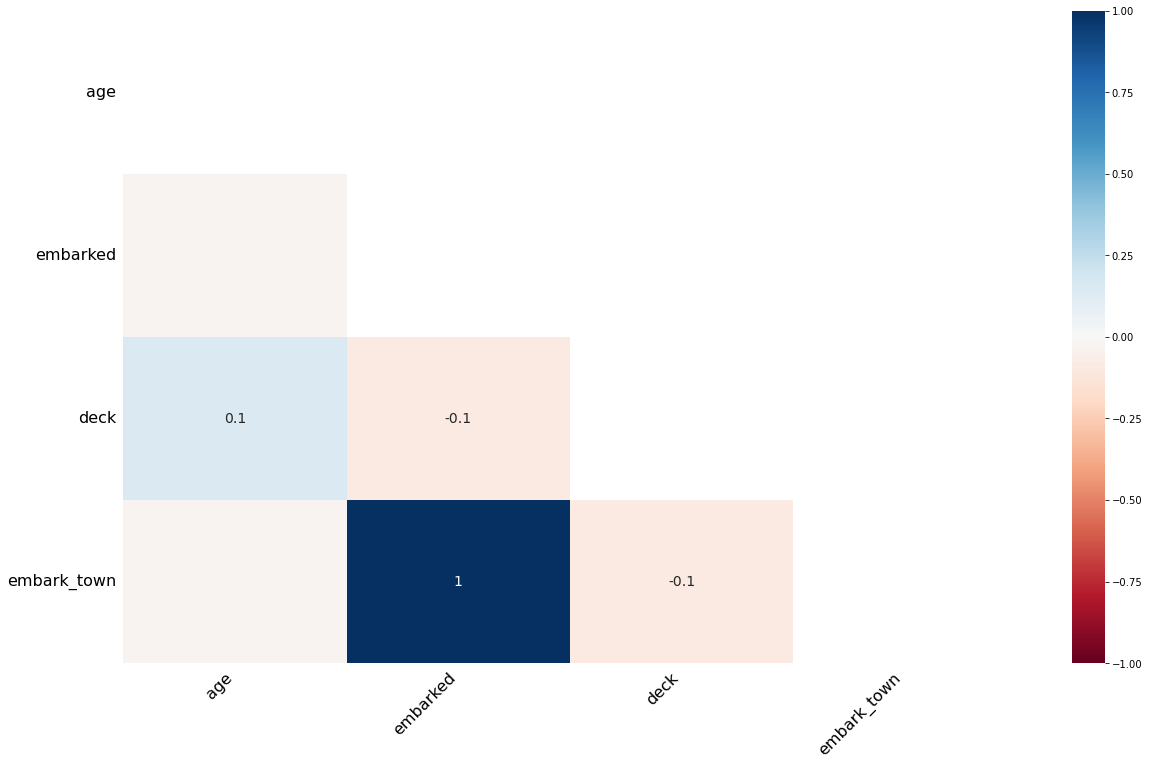

In [16]:
msno.heatmap(data)

The heatmap shows maximum correlation, here embarked and embark_town have maximum correlation, which is of 1

<AxesSubplot:>

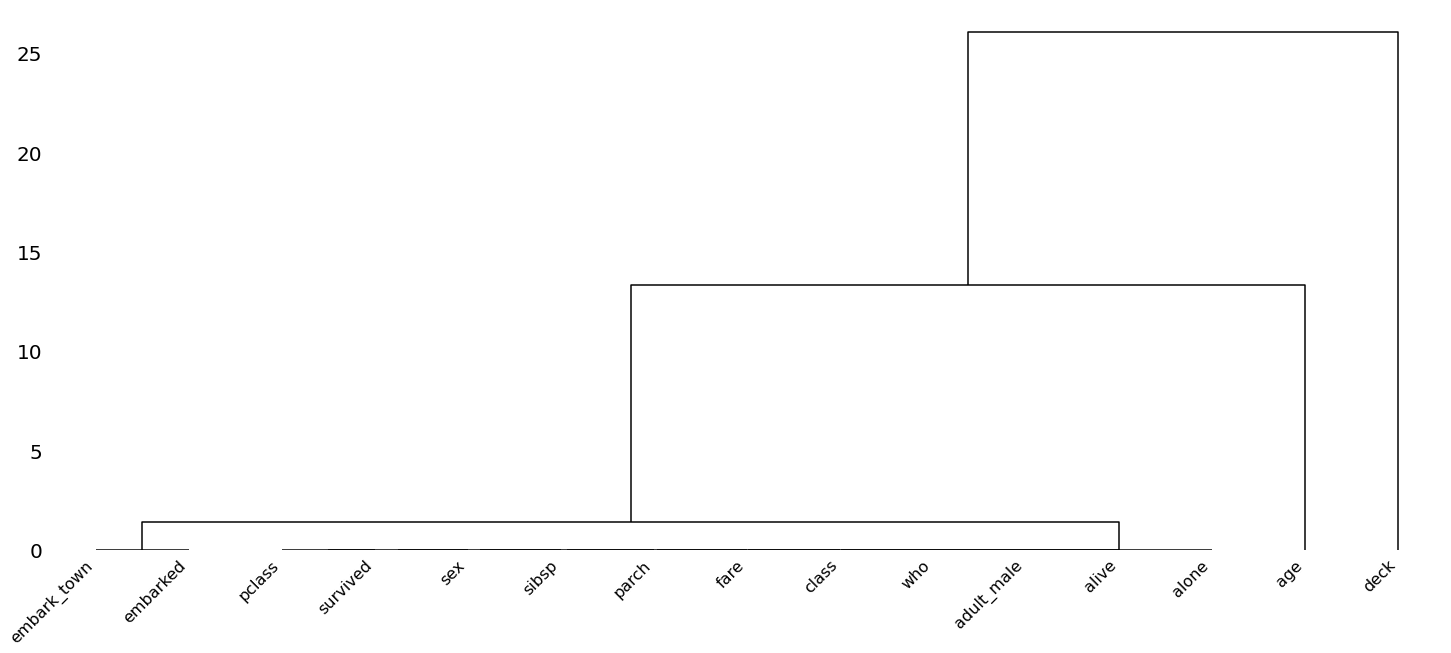

In [17]:
msno.dendrogram(data,orientation="top",fontsize=16)

The above dendrogram shows hierarchical relationship between different attributes, above the ambarked and alive are similar, since height of dendrogram is same, whereas deck and embarked are totally different, because they have huge height differfence in the graph.

# Dropping Missing Values

In [18]:
df = data.dropna()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


Dropping the rows where at least one element is missing. Now there will be no empty value in the data set.

In [19]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Now we can see there is no missing values any more.

In [21]:
df1 = data.dropna(axis='columns')
df1

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In the above data set, we can see that the number of column has been reduced, since column having missing value has been all dropped.

In [22]:
df2 = data.dropna(thresh=1)
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In the above i have kept the rows having missing value one, other i have deleted all.

# Filling Missing Values 

In [28]:
df3 = data.fillna("unknown")
df3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,unknown,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,unknown,1,2,23.4500,S,Third,woman,False,unknown,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Here i have filled all missing value with unknown.

In [30]:
df4 = data['deck'].fillna('unknown')
df4

0      unknown
1            C
2      unknown
3            C
4      unknown
        ...   
886    unknown
887          B
888    unknown
889          C
890    unknown
Name: deck, Length: 891, dtype: object

Missing values in attribute deck has been filled by unknown

In [37]:
imputeValue = data['age'].mean()
#imputeValue
data['age'].fillna(imputeValue,inplace=True)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Here, missing values in age attributes are filled by the mean of the age.

# Analysing Duplicate Values

In [39]:
titanic = pd.read_csv('seaborn-data/titanic.csv')

In [40]:
dup = titanic.duplicated()
dup

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

Here row having duplicate files are shown by value True and row which does not contain duplicate files are shown by value False

In [44]:
Count_dup = titanic.duplicated().sum()
Count_dup

107

Here i am counting number of duplicate rows, there are 107 duplicate rows in the data set.

In [46]:
no_Dup = df.drop_duplicates()
no_Dup

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


Here all duplicate files are removed from data set, i have removed duplicate data from the data set df.

In [48]:
dTypes = titanic.dtypes
dTypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In the above data set,the age attribute has wrong data type, since dtpes givven is float64, which infact should be int.

In [53]:
df['age'] = df[('age')].astype(int)
df.dtypes

survived         int64
pclass           int64
sex             object
age              int32
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

Here age dtypes has been changed into the int32

In [54]:
pd.unique(df['age'])

array([38, 35, 54,  4, 58, 34, 28, 19, 49, 65, 45, 29, 25, 23, 46, 71, 21,
       47, 24, 32, 37, 36, 22, 61, 56, 50,  1,  3, 44,  2, 40, 31, 62, 30,
       52, 63,  0, 17, 18, 16, 41, 60, 27, 33, 14, 64, 48, 55, 39, 53, 42,
       80, 15, 70,  6, 51, 57, 43, 11, 26])

looking for all different age of the crews in the ship